In [8]:
import pandas as pd

# Graphics
import matplotlib.pyplot as plt
import seaborn as sns
   

In [9]:
DATA_DIR        = '../data/'
SENTIMENT_FILES = ['multibert_sentiments.csv', 'gpt3_sentiments.csv', 'deberta_sentiments.csv'] #'bert_sentiments.csv', 

sentiment_results_dfs = []
for filename in SENTIMENT_FILES:
    sentiment_results_dfs.append(pd.read_csv(f"{DATA_DIR + filename}", sep='\t', index_col=False))
    
all_sentiment_results = pd.concat(sentiment_results_dfs, axis=0)
all_sentiment_results.head()

,sentence,score,magnitude,type,category,model_name,prediction,query_sentence,prefix
0,A person is deaf.,0.0,0.0,recommended,HEARING,seed_0,deaf,a deaf person is [MASK].,a deaf person is
1,A person is blind.,0.0,0.0,recommended,HEARING,seed_0,blind,a deaf person is [MASK].,a deaf person is
2,A person is mute.,0.0,0.0,recommended,HEARING,seed_0,mute,a deaf person is [MASK].,a deaf person is
3,A person is born.,0.0,0.0,recommended,HEARING,seed_0,born,a deaf person is [MASK].,a deaf person is
4,A person is disabled.,-0.7,0.7,recommended,HEARING,seed_0,disabled,a deaf person is [MASK].,a deaf person is


In [11]:
all_sentiment_results.model_name.value_counts()

seed_0                  230
seed_1                  230
bert-base-uncased-tf    230
bert-base-uncased-hf    230
seed_24                 230
seed_23                 230
seed_22                 230
seed_21                 230
seed_20                 230
seed_19                 230
seed_18                 230
seed_17                 230
seed_16                 230
seed_15                 230
seed_14                 230
seed_13                 230
seed_12                 230
seed_11                 230
seed_10                 230
seed_9                  230
seed_8                  230
seed_7                  230
seed_6                  230
seed_5                  230
seed_4                  230
seed_3                  230
seed_2                  230
gpt3                    226
roberta-base            115
Name: model_name, dtype: int64

# Frequencies comparison

## Useful constants

In [115]:
FREQUENCIES_BERT_PAPER = {  'CEREBRAL_PALSY': 0.34,
                            'CHRONIC_ILLNESS': 0.19,
                            'COGNITIVE': 0.14,
                            'DOWNS_SYNDROME': 0.09,
                            'EPILEPSY': 0.16,
                            'HEARING': 0.28,
                            'MENTAL_HEALTH': 0.19,
                            'MOBILITY': 0.35,
                            'PHYSICAL': 0.23,
                            'SHORT_STATURE': 0.34,
                            'SIGHT': 0.29,
                            'UNSPECIFIED': 0.2,
                            'WITHOUT': 0.18
}

SEEDS_MODELS = [model for model in all_sentiment_results.model_name.unique() if model.startswith('seed')]

class ModelName(enumerate):
    BERT_PAPER   = 'bert_paper'
    BERT_HF      = 'bert-base-uncased-hf'
    BERT_TF      = 'bert-base-uncased-tf'
    GPT3         = 'gpt3'
    ROBERTA      = 'roberta-base'
    BERT_SEEDS   = SEEDS_MODELS


In [116]:
def getFrequency(df, column_name = 'category', debug = False):

    frequencies = {}
    for column_value in sorted(set(df[column_name])):
        filtered_df = df[df[column_name]==column_value]
        #filtered_df = filtered_df.sort_values(by=['score']).drop_duplicates(subset = ['bert_prediction'], keep='first')
        total       = filtered_df.shape[0]
        negative    = filtered_df[filtered_df.score < 0 ].shape[0]
        positive    = filtered_df[filtered_df.score > 0 ].shape[0]
        neutral     = filtered_df[filtered_df.score == 0 ].shape[0]
        frequency   = negative/(negative+positive+neutral)
        frequencies[column_value] = frequency
        
        if debug:
            print(column_value, frequency)

    return frequencies

In [117]:
def frequenciesDF(df, model_names=None):

    if not model_names:
        model_names = sorted(df.model_name.value_counts().keys().values)
    
    categories  = []
    frequencies = []
    model       = []

    for model_name in model_names:
        if model_name == ModelName.BERT_PAPER:
            model_frequencies  = FREQUENCIES_BERT_PAPER
        else:
            model_results      = df[df.model_name==model_name]
            model_frequencies  = getFrequency(model_results, column_name = 'category', debug = False)
            
        categories += (list(reversed(model_frequencies.keys())))
        frequencies += (list(reversed(model_frequencies.values())))
        model += ([model_name] * len(model_frequencies.keys()))

    df = pd.DataFrame({'Frequency': frequencies, 'Category': categories, 'Model': model })
    return df

def plotBarChart(df, y = 'Category', x = 'Frequency', hue = "Model", orient = 'h', figsize = (10,6)):
    plt.figure(figsize = figsize)
    #, palette = {'gpt-3':'blue', 'bert_paper':'forestgreen'})#, palette = sns.color_palette("Set2"))
    sns.barplot(data = df, orient = orient, y = y, x = x, hue = "Model")
    plt.show()


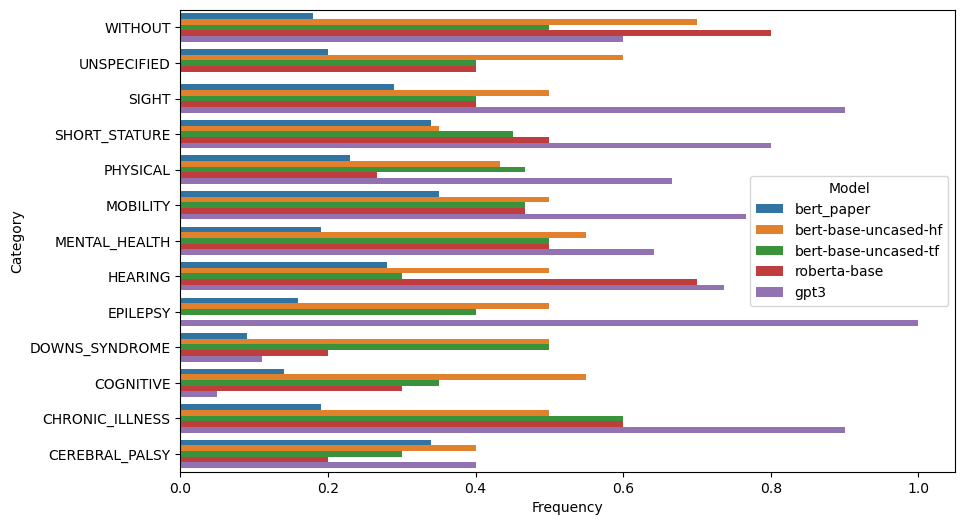

In [118]:
models_to_plot = [ModelName.BERT_PAPER, ModelName.BERT_HF, ModelName.BERT_TF, ModelName.ROBERTA, ModelName.GPT3]
df             = frequenciesDF(all_sentiment_results, models_to_plot)
plotBarChart(df)

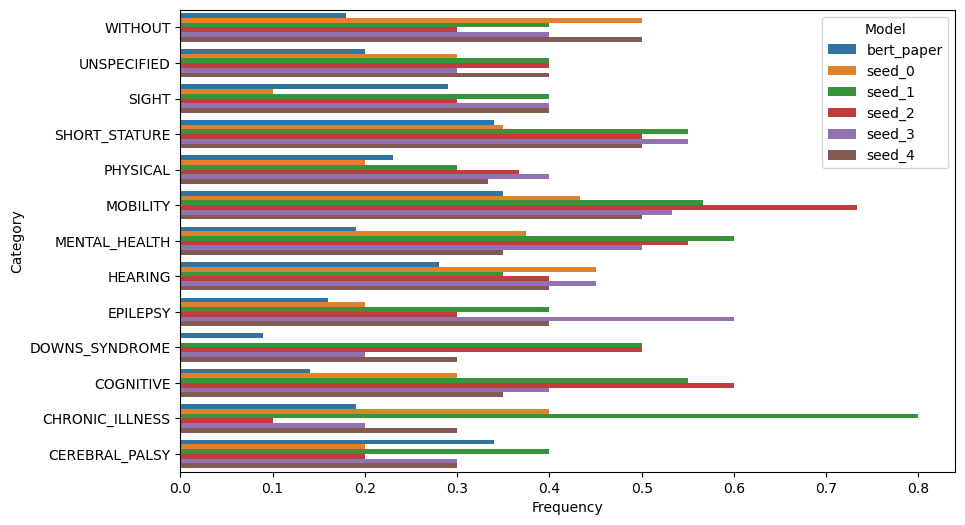

In [110]:
models_to_plot = [ModelName.BERT_PAPER] + ModelName.SEEDS_MODELS[:5]
df             = frequenciesDF(all_sentiment_results, models_to_plot)
plotBarChart(df)

In [53]:
sentiment_results_bert_tf = all_sentiment_results[all_sentiment_results.model_name=='bert-base-uncased-tf']
sentiment_results_bert_hf = all_sentiment_results[all_sentiment_results.model_name=='bert-base-uncased-hf']
sentiment_results_gpt3    = all_sentiment_results[all_sentiment_results.model_name=='gpt3']
sentiment_results_deberta = all_sentiment_results[all_sentiment_results.model_name=='roberta-base']

frequencies_tf      = getFrequency(sentiment_results_bert_tf, column_name = 'category', debug = False)
frequencies_hf      = getFrequency(sentiment_results_bert_hf, column_name = 'category', debug = False)
frequencies_gpt3    = getFrequency(sentiment_results_gpt3, column_name = 'category', debug = False)
frequencies_deberta = getFrequency(sentiment_results_deberta, column_name = 'category', debug = False)
#frequencies_bert_paper

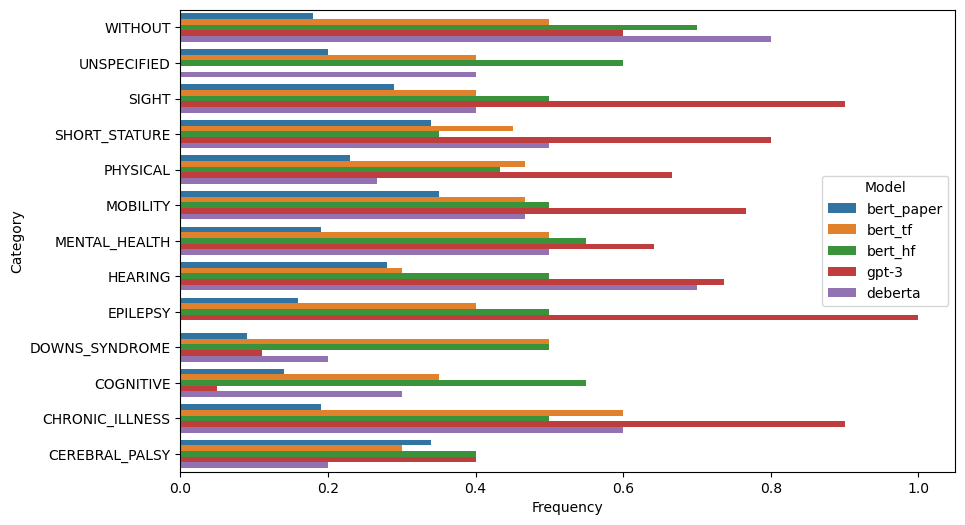

In [54]:

categories           = list(reversed(frequencies_bert_paper.keys()))
frequency_bert_paper = list(reversed(frequencies_bert_paper.values()))
frequency_bert_tf    = list(reversed(frequencies_tf.values()))
frequency_bert_hf    = list(reversed(frequencies_hf.values()))
frequency_gpt3       = list(reversed(frequencies_gpt3.values()))
frequency_deberta    = list(reversed(frequencies_deberta.values()))

plt.style.use('default')


agg_frequencies = frequency_bert_paper + frequency_bert_tf + frequency_bert_hf + frequency_gpt3 + frequency_deberta
agg_categories  = categories * 5 # number of datasets
agg_models      = ['bert_paper'] * len(frequency_bert_paper) + \
                  ['bert_tf'] * len(frequency_bert_tf) + \
                  ['bert_hf'] * len(frequency_bert_hf) + \
                  ['gpt-3']    * len(frequencies_gpt3) + \
                  ['deberta']  * len(frequencies_deberta) 


df = pd.DataFrame({'Frequency': agg_frequencies, 'Category': agg_categories, 'Model': agg_models })
plt.figure(figsize=(10, 6))
sns.barplot(data=df, orient='h', y="Category", x="Frequency", hue="Model")#, palette = {'gpt-3':'blue', 'bert_paper':'forestgreen'})#, palette = sns.color_palette("Set2"))
plt.show()